# Обработка текста

#Import библиотек

In [0]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, CuDNNLSTM, CuDNNGRU, Bidirectional
from tensorflow.python.keras.optimizers import Adam, RMSprop


from tensorflow.keras.preprocessing.sequence import pad_sequences

#Загрузка файлов

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Выводим список файлов в папке
file_list = drive.ListFile({'q': "'1cXnZNC4EFaGj75c6YGWytAgQ-6-OZS3j' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

W0818 16:40:15.387716 140183734060928 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

title: 007_hw Sokolov Copy of Июльский курс. Обработка текста, id: 1RpjH2mPa-xhFVHD5Acv2PC-mTIyQ4F3e
title: Июльский курс. Домашнее задание к занятию 4. Обработка текстов, id: 1kx2NS6R0cZMmuWwC5bSPt0Z45fa0Wns85qxZtOmICFg
title: 07_ hw Sokolov Домашнее задание к занятию 4. Обработка текстов, id: 1J0ZkYMX9SvOFec3d8SURF0X5J_bt96nqVCqWZMFaRko
title: Strugatskie_Obuchayuschaya_5_vmeste (1).txt, id: 1h0p5H59UE8sQBEAdsGxmbEXnQeDO2xf2
title: Strugatskie_Testovaya_2_vmeste (1).txt, id: 1yLvU9ndTlWJztnCo9k2Cfo2B_3I0Ra4l
title: Rey_Bredberri_Obuchayuschaya_22_vmeste (1).txt, id: 1-Hjb5ivekiy4IxSL6ruHWqn_pfIy5HWm
title: O_Genri_Obuchayuschaya_50_vmeste (1).txt, id: 1K9Q_K3Zp0qd0k68eFheffmQozLgmOnK9
title: Bulgakov_Testovaya_2_vmeste (1).txt, id: 1QNZln44GfFekHtgEyGWNXu7T5RhNjimi
title: Rey_Bredberri_Testovaya_8_vmeste (1).txt, id: 15G8lHW-M65S-tIv7_LVK6bfmG6z5zNQt
title: Max_Fray_Obuchayuschaya_5_vmeste (1).txt, id: 1GkqLs3XOs5R-9uVtnfk7MrAg9tHOt5JK
title: Klifford_Saymak_Obuchayuschaya_5_vmeste (

In [0]:
# Загружаем необходимые файлы
#1
train_downloaded = drive.CreateFile({'id': '1K9Q_K3Zp0qd0k68eFheffmQozLgmOnK9'})
train_downloaded.GetContentFile('O_Genri_Obuchayuschaya_50_vmeste (1).txt')
#1
train_downloaded = drive.CreateFile({'id': '1h0p5H59UE8sQBEAdsGxmbEXnQeDO2xf2'})
train_downloaded.GetContentFile('Strugatskie_Obuchayuschaya_5_vmeste (1).txt')
#1
train_downloaded = drive.CreateFile({'id': '1LNqxK1K62P86fVBA6iBwFYAs2Lr7lzz-'})
train_downloaded.GetContentFile('Bulgakov_Obuchayuschaya_5_vmeste (1).txt')
#1
train_downloaded = drive.CreateFile({'id': '1ZhGGN0y_FK9chY5i3rwwPnq8KSWIOTRB'})
train_downloaded.GetContentFile('Klifford_Saymak_Obuchayuschaya_5_vmeste (1).txt')
#1
train_downloaded = drive.CreateFile({'id': '1GkqLs3XOs5R-9uVtnfk7MrAg9tHOt5JK'})
train_downloaded.GetContentFile('Max_Fray_Obuchayuschaya_5_vmeste (1).txt')
#1
train_downloaded = drive.CreateFile({'id': '1BK07yhrfm2UJsVb4Duw8E_3j5imLTDcD'})
train_downloaded.GetContentFile('Klifford_Saymak_Testovaya_2_vmeste (1).txt')
#1
train_downloaded = drive.CreateFile({'id': '1YThShm4zEiSzyfunlDScsgIBbENds2Lm'})
train_downloaded.GetContentFile('O_Genri_Testovaya_20_vmeste (1).txt')
#1
train_downloaded = drive.CreateFile({'id': '10BYXRC5R_8hVo9EcSVz1a-ek5GeZDU8S'})
train_downloaded.GetContentFile('Max_Fray_Testovaya_2_vmeste (1).txt')
#1
train_downloaded = drive.CreateFile({'id': '1-Hjb5ivekiy4IxSL6ruHWqn_pfIy5HWm'})
train_downloaded.GetContentFile('Rey_Bredberri_Obuchayuschaya_22_vmeste (1).txt')
#1
train_downloaded = drive.CreateFile({'id': '15G8lHW-M65S-tIv7_LVK6bfmG6z5zNQt'})
train_downloaded.GetContentFile('Rey_Bredberri_Testovaya_8_vmeste (1).txt')
#1
train_downloaded = drive.CreateFile({'id': '1QNZln44GfFekHtgEyGWNXu7T5RhNjimi'})
train_downloaded.GetContentFile('Bulgakov_Testovaya_2_vmeste (1).txt')
#1
train_downloaded = drive.CreateFile({'id': '1yLvU9ndTlWJztnCo9k2Cfo2B_3I0Ra4l'})
train_downloaded.GetContentFile('Strugatskie_Testovaya_2_vmeste (1).txt')

In [0]:
!ls

 adc.json
'Bulgakov_Obuchayuschaya_5_vmeste (1).txt'
'Bulgakov_Testovaya_2_vmeste (1).txt'
'Klifford_Saymak_Obuchayuschaya_5_vmeste (1).txt'
'Klifford_Saymak_Testovaya_2_vmeste (1).txt'
'Max_Fray_Obuchayuschaya_5_vmeste (1).txt'
'Max_Fray_Testovaya_2_vmeste (1).txt'
'O_Genri_Obuchayuschaya_50_vmeste (1).txt'
'O_Genri_Testovaya_20_vmeste (1).txt'
'Rey_Bredberri_Obuchayuschaya_22_vmeste (1).txt'
'Rey_Bredberri_Testovaya_8_vmeste (1).txt'
 sample_data
'Strugatskie_Obuchayuschaya_5_vmeste (1).txt'
'Strugatskie_Testovaya_2_vmeste (1).txt'


#Объявление функций

In [0]:
#####
# Чтение файла в текст
#####

def readText(fileName):
  f = open(fileName, 'r')
  text = f.read()
  text = text.replace("\n", " ")
  
  return text


#####
# Очистка текста и превращение в набор слов
#####

def text2Words(text):

  # Очищаем текст от лищних символов и переводим в нижний регистр
  
  text = text.replace(".", "")
  text = text.replace("—", "")
  text = text.replace(",", "")
  text = text.replace("!", "")
  text = text.replace("?", "")
  text = text.replace("…", "")
  text = text.lower()
  
  # Делим тест на слова
  
  words = []
  currWord = ""
  for symbol in text:
    
    if (symbol != "\ufeff"):
      if (symbol != " "):
        currWord += symbol
      else:
        if (currWord != ""):
          words.append(currWord)
          currWord = ""

  if (currWord != ""):
        words.append(currWord)
  
  return words

#Загрузка данных

**Обучающая выборка**

In [0]:
##### 
# Загружаем чистые тексты
##### 

trainText = []

# Добавляем тексты в массив

trainText.append(readText('O_Genri_Obuchayuschaya_50_vmeste (1).txt'))
trainText.append(readText('Strugatskie_Obuchayuschaya_5_vmeste (1).txt'))
trainText.append(readText('Bulgakov_Obuchayuschaya_5_vmeste (1).txt'))
trainText.append(readText('Klifford_Saymak_Obuchayuschaya_5_vmeste (1).txt'))
trainText.append(readText('Max_Fray_Obuchayuschaya_5_vmeste (1).txt'))
trainText.append(readText('Rey_Bredberri_Obuchayuschaya_22_vmeste (1).txt'))

# Превращаем тексты в листы слов

trainWords = []
currWords = []
allWords = []

for txt in trainText:
  currWords = text2Words(txt) # [:10000]
  trainWords.append(currWords)
  allWords += currWords

# Запоминаем названия и количество классов

className = ["О. Генри", "Стругацкие", "Булгаков", "Саймак", "Фрай", "Брэдбери"]
nClasses = len(trainWords)

# Выводим статистику по обучающей выборке

print("Тексты")
for i in range(6):
  print(className[i], " ", trainText[i][:40])

print()
print("Слова")
for i in range(6):
  print(className[i], " ", trainWords[i][:10])

print()
print("Статистика")
for i in range(6):
  print(className[i], " ", len(trainText[i]), " символов, ", len(trainWords[i]), " слов")
print("В сумме ", len(trainText[0])+len(trainText[1])+len(trainText[2])+len(trainText[3])+len(trainText[4])+len(trainText[5]), " символов, ", len(allWords), " слов")

Тексты
О. Генри   «Лиса-на-рассвете»   Коралио нежился в п
Стругацкие   Парень из преисподней     1     Ну и дер
Булгаков   ﻿Белая гвардия   Посвящается[1]  Любови 
Саймак   ﻿Всё живое...     Когда я выехал из наше
Фрай   ﻿Власть несбывшегося   – С тех пор как м
Брэдбери   ﻿451° по Фаренгейту   ДОНУ КОНГДОНУ С БЛ

Слова
О. Генри   ['«лиса-на-рассвете»', 'коралио', 'нежился', 'в', 'полуденном', 'зное', 'как', 'томная', 'красавица', 'в']
Стругацкие   ['парень', 'из', 'преисподней', '1', 'ну', 'и', 'деревня', 'сроду', 'я', 'таких']
Булгаков   ['белая', 'гвардия', 'посвящается[1]', 'любови', 'евгеньевне', 'белозерской[2]', 'пошел', 'мелкий', 'снег', 'и']
Саймак   ['всё', 'живое', 'когда', 'я', 'выехал', 'из', 'нашего', 'городишка', 'и', 'повернул']
Фрай   ['власть', 'несбывшегося', '–', 'с', 'тех', 'пор', 'как', 'меня', 'угораздило', 'побывать']
Брэдбери   ['451°', 'по', 'фаренгейту', 'дону', 'конгдону', 'с', 'благодарностью', 'если', 'тебе', 'дадут']

Статистика
О. Генри   1049517  символ

**Проверочная выборка**

In [0]:
##### 
# Загружаем чистые тексты
##### 

testText = []


testText.append(readText('O_Genri_Testovaya_20_vmeste (1).txt'))
testText.append(readText('Strugatskie_Testovaya_2_vmeste (1).txt'))
testText.append(readText('Bulgakov_Testovaya_2_vmeste (1).txt'))
testText.append(readText('Klifford_Saymak_Testovaya_2_vmeste (1).txt'))
testText.append(readText('Max_Fray_Testovaya_2_vmeste (1).txt'))
testText.append(readText('Rey_Bredberri_Testovaya_8_vmeste (1).txt'))

#Превращаем тексты в листы слов

testWords = []
currWords = []

for txt in testText:
  currWords = text2Words(txt)
  testWords.append(currWords)

#Выводим статистику по проверочной выборке

print("Тестовые тексты")
for i in range(6):
  print(className[i], " ", testText[i][:40])

print()
print("Слова")
for i in range(6):
  print(className[i], " ", testWords[i][:10])

print()
print("Статистика")
for i in range(6):
  print(className[i], " ", len(testText[i]), " символов, ", len(testWords[i]), " слов")
print("В сумме ", len(testText[0])+len(testText[1])+len(testText[2])+len(testText[3])+len(testText[4])+len(testText[5]), " символов, ", len(testWords[0])+len(testWords[1])+len(testWords[2])+len(testWords[3])+len(testWords[4])+len(testWords[5]), " слов")

Тестовые тексты
О. Генри   ﻿Багдадская птица   Без всякого сомнения
Стругацкие   ﻿ОТЕЛЬ «У ПОГИБШЕГО АЛЬПИНИСТА»    ГЛАВА
Булгаков   ﻿Дон Кихот ДЕЙСТВУЮЩИЕ ЛИЦА Алонсо Кихан
Саймак   ﻿Зачарованное паломничество    1  Гоблин
Фрай   ﻿Слишком много кошмаров    Когда баланси
Брэдбери   ﻿Марсианские хроники   МОЕЙ ЖЕНЕ МАРГАРЕ

Слова
О. Генри   ['багдадская', 'птица', 'без', 'всякого', 'сомнения', 'дух', 'и', 'гений', 'калифа', 'гаруна']
Стругацкие   ['отель', '«у', 'погибшего', 'альпиниста»', 'глава', '1', 'я', 'остановил', 'машину', 'вылез']
Булгаков   ['дон', 'кихот', 'действующие', 'лица', 'алонсо', 'кихано', 'он', 'же', 'дон', 'кихот']
Саймак   ['зачарованное', 'паломничество', '1', 'гоблин', 'со', 'стропил', 'следил', 'за', 'прячущимся', 'монахом']
Фрай   ['слишком', 'много', 'кошмаров', 'когда', 'балансируешь', 'над', 'пропастью', 'на', 'узкой', 'скользкой']
Брэдбери   ['марсианские', 'хроники', 'моей', 'жене', 'маргарет', 'с', 'искренней', 'любовью', '«великое', 'дело']

Статистика


#Создание словаря

In [0]:
#####
# Создание словаря - все слова, упорядоченные по частоте появления
#####

def createVocabulary(allWords):
  
  # Создаём пустой dictionary с ключами по всем словам
  
  wCount = dict.fromkeys(allWords, 0)

  # Считаем количество появления каждого слова
  
  for word in allWords:
    wCount[word] += 1
  print("Собрана частота появления слов")

  # Сортируем лист по количеству появлений слов
  
  wordsList = list(wCount.items())
  wordsList.sort(key = lambda i:i[1], reverse=1)

  # Составляем список слов, отсортированных по частоте появления
  
  sortedWords = []
  for word in wordsList:
    sortedWords.append(word[0])
  print("Слова отсортированы по частоте")
    
  # Указываем всем словам индексы
  
  wordIndexes = dict.fromkeys(allWords, 0)
  wordKeys = wordIndexes.keys()
  wordKeysLen = len(wordKeys)

  index = 0
  lastPer = 0
  for word in wordKeys:
    wordIndexes[word] = sortedWords.index(word)+1
    index += 1
    per = round(100 * index / wordKeysLen)
    
    if (((per % 10) == 0) & (lastPer != per)):
      print(per, "% обработано", sep="")
      lastPer = per
  print("Собран словарь частотности слов")
  
  return wordIndexes

**Создаём словарь**

In [0]:
vocabulary = createVocabulary(allWords)
print(len(vocabulary))

Собрана частота появления слов
Слова отсортированы по частоте
10% обработано
20% обработано
30% обработано
40% обработано
50% обработано
60% обработано
70% обработано
80% обработано
90% обработано
100% обработано
Собран словарь частотности слов
156299


**Проверяем индексы слов**

In [0]:
vocabulary["разделить"]

5735

#Создание обучающей и проверочной выборки

In [0]:
#####
# Преобразования листа слов в лист индексов
#####

def words2Indexes(words, vocabulary, maxWordsCount):
  wordsIndexes = []
  
  for word in words:
    
    # По default записываем неизвестное слово
    
    wordIndex = 0
    
    # Проверяем, есть ли текущее слово в словаре
    
    wordInVocabulary = word in vocabulary
    
    # Если слово есть в словаре
    
    if (wordInVocabulary):
      
      # Получаем индекс слова
      
      index = vocabulary[word]
      
      # Если индекс меньше maxWordsCount, по которому мы отсекаем словарь
      
      if (index < maxWordsCount):
        
        # То будем записывать индекс
        
        wordIndex = index
        
    wordsIndexes.append(wordIndex)
    
  return wordsIndexes

#####
# Формирование индексов слов по всем классам писателей
#####

def getTrainWordIndexes(maxWordsCount):

  # Проходим повсем 6 классам
  
  # И превращаем слова в индексы
  
  trainWordIndexes = []
  for w in trainWords:
    trainWordIndexes.append(words2Indexes(w, vocabulary, maxWordsCount))
    
  return trainWordIndexes


#####
# Формирование обучающей выборки по листу индексов слов
# (разделение на короткие векторы)
#####

def getSetFromIndexes(wordIndexes, xLen, step):
  xTrain = []
  wordsLen = len(wordIndexes)
  index = 0
  
  # Идём по всей длине вектора индексов
  
  # "Откусываем" векторы длины xLen и смещаеммся вперёд на step
  
  while (index + xLen <= wordsLen):
    xTrain.append(wordIndexes[index:index+xLen])
    index += step
    
  return xTrain


#####
# Формирование обучающей и проверочной выборки выборки
# Из двух листов индексов от двух классов
#####

def createSetsMultiClasses(wordIndexes, xLen, step):

  # Для каждого из 6 классов
  
  # Создаём обучающую выборку из индексов
  
  nClasses = len(wordIndexes)
  classesXTrain = []
  for wI in wordIndexes:
    classesXTrain.append(getSetFromIndexes(wI, xLen, step))

  # Формируем один общий xTrain
  
  xTrain = []
  yTrain = []
  
  for t in range(nClasses):
    xT = classesXTrain[t]
    for i in range(len(xT)):
      xTrain.append(xT[i])
    
    # Формируем yTrain по номеру класса
    
    currY = utils.to_categorical(t, nClasses)
    for i in range(len(xT)):
      yTrain.append(currY)

  xTrain = np.array(xTrain)
  yTrain = np.array(yTrain)

  
  return (xTrain, yTrain)


#####
# Преобразование одного короткого вектора в вектор из 0 и 1
# По принципу words bag
#####

def changeXTo01(trainVector, wordsCount):
  out = np.zeros(wordsCount)
  
  # Идём по всем индексам слов в векторе
  
  # И проставляем 1 в ячейку, соответствующие индексу слова
  
  for x in trainVector:
    out[x] = 1
    
  return out


#####
# Преобразование выборки (обучающей или проверочной) к виду 0 и 1
# По принципу words bag
#####

def changeSetTo01(trainSet, wordsCount):
  out = []
  
  # Прозодим по всем векторам в xTrain
  # И  превращаем каждый в вектор 01
  
  for x in trainSet:
    out.append(changeXTo01(x, wordsCount))
    
  return np.array(out)


#####
# Загружаем тестовую выборку
#####

def getTestSets(testWords, vocabulary, maxWordsCount, xLen, step):
  testWordIndexes = []
  xTest = []

  # Проходим по каждому классу проверочной выборки
  
  for i in range(nClasses):

    # И формируем для каждого класса xTest
    
    currWordIndexes = words2Indexes(testWords[i], vocabulary, maxWordsCount)
    currXTest = getSetFromIndexes(currWordIndexes, xLen, step)
    currXTest = np.array(currXTest)
    xTest.append(currXTest)
 
  return xTest
                           
                           
#####
# Создание общей тестовой выборки
#####

def getGlobalTestSet(xTest):
  xTestAll = []
  yTestAll = []
  
  # Проходим по всем классам и объединяем в одну большую выборку
  
  for i in range(nClasses):
    for j in range(len(xTest[i])):
      xTestAll.append(xTest[i][j])
      yTestAll.append(utils.to_categorical(i, nClasses))
  
  xTestAll = np.array(xTestAll)
  yTestAll = np.array(yTestAll)
  return xTestAll, yTestAll

**Подготовка данных**

In [0]:
# Задаём базовые параметры

xLen = 1000 # Длина отрезка текста, по которой анализируем, в словах
step = 100 # Шаг разбиения исходного текста на обучающие вектора
maxWordsCount = 20000 # Число слов из словаря, которые используем для анализа

# Формируем обучающую выборку

trainWordIndexes = getTrainWordIndexes(maxWordsCount)
(xTrain, yTrain) = createSetsMultiClasses(trainWordIndexes, xLen, step)
xTrain01 = changeSetTo01(xTrain, maxWordsCount)

# Формируем тестовую выборку

xTest = getTestSets(testWords, vocabulary, maxWordsCount, xLen, step)
xTest01 = np.array([changeSetTo01(xt, maxWordsCount) for xt in xTest])
xTestAll, yTestAll = getGlobalTestSet(xTest)
xTestAll01 = changeSetTo01(xTestAll, maxWordsCount)

In [0]:
# Пример превращения слов в индексы

print(trainWordIndexes[0])

[0, 1769, 0, 3, 0, 0, 11, 0, 7846, 3, 3305, 0, 0, 268, 1041, 14, 243, 2140, 6, 0, 0, 646, 9, 2523, 0, 0, 3, 0, 9544, 954, 11, 26, 52, 0, 126, 124, 0, 119, 1404, 3165, 0, 906, 0, 1158, 15445, 0, 34, 190, 0, 66, 0, 2645, 5096, 0, 939, 0, 1956, 0, 3306, 3, 0, 10091, 1, 0, 16941, 0, 215, 0, 0, 11, 15446, 0, 137, 711, 0, 0, 571, 268, 0, 1, 0, 0, 6640, 18, 0, 0, 366, 15447, 86, 15, 0, 0, 16942, 13108, 1526, 6, 0, 0, 0, 0, 0, 0, 9038, 7502, 49, 61, 0, 15448, 4939, 237, 268, 4176, 75, 2822, 11417, 4, 747, 3395, 3, 1769, 4177, 4782, 8, 8197, 0, 0, 1365, 6362, 2227, 0, 920, 279, 0, 7182, 337, 6911, 215, 12205, 18, 0, 138, 11417, 902, 8, 6641, 9039, 5487, 4783, 30, 0, 1, 0, 0, 13109, 3778, 6, 7183, 1, 15449, 0, 1, 0, 0, 0, 0, 13108, 0, 0, 333, 2439, 0, 0, 0, 0, 133, 39, 0, 0, 5682, 1, 3166, 7, 1526, 6, 955, 0, 8, 0, 0, 0, 1, 5488, 3, 171, 0, 18792, 4278, 0, 2032, 7, 2439, 1526, 0, 3458, 877, 10735, 14211, 92, 3, 1274, 16943, 43, 3, 1631, 2302, 10092, 15450, 683, 1499, 105, 1, 4279, 6, 529, 126, 1

In [0]:
# Пример превращения слов в bag of words

print(xTrain01[1, 2000:2020])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# Размер обучающей выборки, сформированной по bag of words

print(xTrain01.shape)

(17863, 20000)


# Архитектура

> Indented block



**01 + Dense**





W0818 16:45:59.284342 140183734060928 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 4s 249us/sample - loss: 0.0518 - acc: 0.9840 - val_loss: 0.7718 - val_acc: 0.7961
Epoch 2/20
17863/17863 [==============================] - 4s 209us/sample - loss: 4.9395e-04 - acc: 1.0000 - val_loss: 0.6438 - val_acc: 0.8202
Epoch 3/20
17863/17863 [==============================] - 4s 214us/sample - loss: 2.7751e-04 - acc: 1.0000 - val_loss: 0.5053 - val_acc: 0.8485
Epoch 4/20
17863/17863 [==============================] - 4s 212us/sample - loss: 1.8838e-04 - acc: 1.0000 - val_loss: 0.4113 - val_acc: 0.8675
Epoch 5/20
17863/17863 [==============================] - 4s 215us/sample - loss: 1.3820e-04 - acc: 1.0000 - val_loss: 0.3677 - val_acc: 0.8731
Epoch 6/20
17863/17863 [==============================] - 4s 212us/sample - loss: 1.0405e-04 - acc: 1.0000 - val_loss: 0.3489 - val_acc: 0.8777
Epoch 7/20
17863/17863 [==============================] - 4s 208us/sample - loss: 8.8301e-0

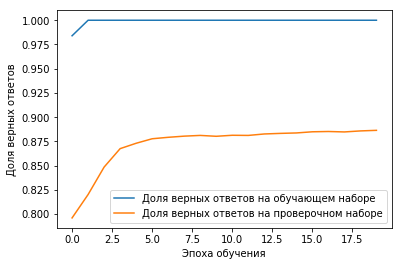

In [0]:
# Создаём полносвязную сеть

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#Распознавание проверочной выборки

In [0]:
#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  98 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  85 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  70 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  84 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  94 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  99 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  88 %



#Embedding

In [0]:
# Задаём параметы для обучения Embedding нейронки

xLen = 1000
step = 100
maxWordsCount = 50000

# Загружаем обучающуюу выборку

trainWordIndexes = getTrainWordIndexes(maxWordsCount)
(xTrain, yTrain) = createSetsMultiClasses(trainWordIndexes, xLen, step)

# Загружаем тестовую выборку

xTest = getTestSets(testWords, vocabulary, maxWordsCount, xLen, step)
xTestAll, yTestAll = getGlobalTestSet(xTest)

**Embedding + Dense**

W0818 16:47:23.904846 140183734060928 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 2s 105us/sample - loss: 0.7195 - acc: 0.7733 - val_loss: 1.7604 - val_acc: 0.3030
Epoch 2/20
17863/17863 [==============================] - 1s 82us/sample - loss: 0.0095 - acc: 0.9998 - val_loss: 1.5274 - val_acc: 0.3094
Epoch 3/20
17863/17863 [==============================] - 1s 81us/sample - loss: 0.0045 - acc: 1.0000 - val_loss: 1.3423 - val_acc: 0.3616
Epoch 4/20
17863/17863 [==============================] - 1s 80us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 1.1260 - val_acc: 0.5358
Epoch 5/20
17863/17863 [==============================] - 1s 82us/sample - loss: 0.0021 - acc: 0.9999 - val_loss: 0.9742 - val_acc: 0.6467
Epoch 6/20
17863/17863 [==============================] - 1s 81us/sample - loss: 0.0015 - acc: 0.9999 - val_loss: 0.8855 - val_acc: 0.6913
Epoch 7/20
17863/17863 [==============================] - 1s 80us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.

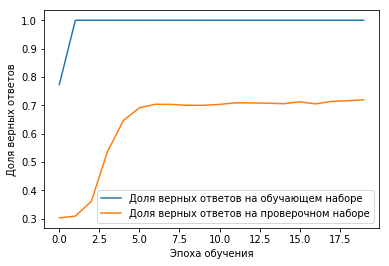

НЕЙРОНКА:  Embedding + Dense

О. Генри  расспознано  84 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  34 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  65 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  59 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  85 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  87 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  71 %



In [0]:
# Создаём сеть с Embedding слоем

modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 30, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.25))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='softmax'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на xTrain

history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Проверяем результаты работы Ebedding сети

pred = recognizeMultiClass(modelE, xTest, "Embedding + Dense")

#Light

## 1. Нейронка c bag of words (01) при разных maxWordsCount

**1.a. Нейронка с bag of words and maxWordsCount = 100**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 4s 230us/sample - loss: 0.0521 - acc: 0.9835 - val_loss: 0.8562 - val_acc: 0.7409
Epoch 2/20
17863/17863 [==============================] - 4s 207us/sample - loss: 5.3643e-04 - acc: 1.0000 - val_loss: 0.7013 - val_acc: 0.7934
Epoch 3/20
17863/17863 [==============================] - 4s 211us/sample - loss: 2.8929e-04 - acc: 1.0000 - val_loss: 0.5491 - val_acc: 0.8305
Epoch 4/20
17863/17863 [==============================] - 4s 214us/sample - loss: 1.9928e-04 - acc: 1.0000 - val_loss: 0.4459 - val_acc: 0.8566
Epoch 5/20
17863/17863 [==============================] - 4s 208us/sample - loss: 1.4622e-04 - acc: 1.0000 - val_loss: 0.3976 - val_acc: 0.8672
Epoch 6/20
17863/17863 [==============================] - 4s 197us/sample - loss: 1.0921e-04 - acc: 1.0000 - val_loss: 0.3763 - val_acc: 0.8729
Epoch 7/20
17863/17863 [==============================] - 4s 206us/sample - loss: 8.9472e-0

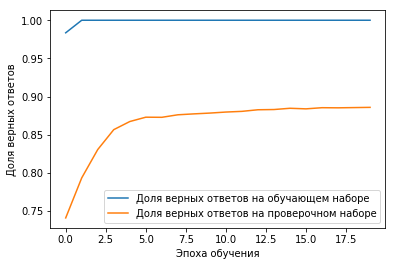

In [0]:
maxWordsCount1 = 100 # Число слов из словаря, которые используем для анализа

# Создаём полносвязную сеть

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount1, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount



In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  98 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  85 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  68 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  86 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  94 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  99 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  88 %



**1.b. Нейронка с bag of words and maxWordsCount = 500**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 4s 207us/sample - loss: 0.0585 - acc: 0.9819 - val_loss: 0.7766 - val_acc: 0.7959
Epoch 2/20
17863/17863 [==============================] - 4s 205us/sample - loss: 5.3923e-04 - acc: 1.0000 - val_loss: 0.6159 - val_acc: 0.8508
Epoch 3/20
17863/17863 [==============================] - 4s 198us/sample - loss: 3.0032e-04 - acc: 1.0000 - val_loss: 0.4780 - val_acc: 0.8824
Epoch 4/20
17863/17863 [==============================] - 4s 211us/sample - loss: 2.1044e-04 - acc: 1.0000 - val_loss: 0.3957 - val_acc: 0.8903
Epoch 5/20
17863/17863 [==============================] - 4s 216us/sample - loss: 1.5018e-04 - acc: 1.0000 - val_loss: 0.3624 - val_acc: 0.8878
Epoch 6/20
17863/17863 [==============================] - 4s 209us/sample - loss: 1.1866e-04 - acc: 1.0000 - val_loss: 0.3548 - val_acc: 0.8818
Epoch 7/20
17863/17863 [==============================] - 4s 211us/sample - loss: 9.5045e-0

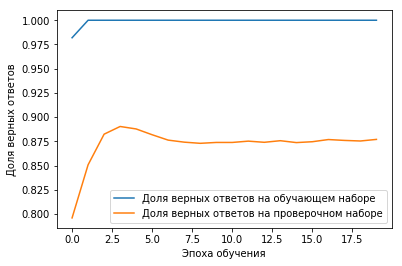

In [0]:
maxWordsCount2 = 500 # Число слов из словаря, которые используем для анализа

# Создаём полносвязную сеть

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount2, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  99 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  87 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  67 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  79 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  92 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  98 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  87 %



**1.c. Нейронка с bag of words and maxWordsCount = 1000**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 4s 221us/sample - loss: 0.0554 - acc: 0.9830 - val_loss: 0.8255 - val_acc: 0.7343
Epoch 2/20
17863/17863 [==============================] - 4s 208us/sample - loss: 5.2121e-04 - acc: 1.0000 - val_loss: 0.6878 - val_acc: 0.7803
Epoch 3/20
17863/17863 [==============================] - 4s 206us/sample - loss: 2.9256e-04 - acc: 1.0000 - val_loss: 0.5289 - val_acc: 0.8344
Epoch 4/20
17863/17863 [==============================] - 4s 214us/sample - loss: 1.9589e-04 - acc: 1.0000 - val_loss: 0.4213 - val_acc: 0.8604
Epoch 5/20
17863/17863 [==============================] - 4s 215us/sample - loss: 1.4691e-04 - acc: 1.0000 - val_loss: 0.3671 - val_acc: 0.8731
Epoch 6/20
17863/17863 [==============================] - 4s 219us/sample - loss: 1.1211e-04 - acc: 1.0000 - val_loss: 0.3489 - val_acc: 0.8753
Epoch 7/20
17863/17863 [==============================] - 4s 221us/sample - loss: 9.1761e-0

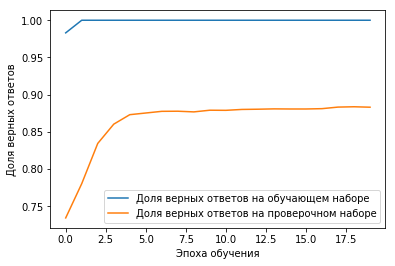

In [0]:
maxWordsCount3 = 1000 # Число слов из словаря, которые используем для анализа

# Создаём полносвязную сеть

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount3, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  97 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  86 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  71 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  80 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  92 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  98 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  88 %



**1.d. Нейронка с bag of words and maxWordsCount = 5000**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 4s 240us/sample - loss: 0.0561 - acc: 0.9831 - val_loss: 0.8155 - val_acc: 0.7648
Epoch 2/20
17863/17863 [==============================] - 4s 215us/sample - loss: 5.1987e-04 - acc: 1.0000 - val_loss: 0.6735 - val_acc: 0.8085
Epoch 3/20
17863/17863 [==============================] - 4s 212us/sample - loss: 2.8785e-04 - acc: 1.0000 - val_loss: 0.5261 - val_acc: 0.8464
Epoch 4/20
17863/17863 [==============================] - 4s 212us/sample - loss: 1.9709e-04 - acc: 1.0000 - val_loss: 0.4265 - val_acc: 0.8689
Epoch 5/20
17863/17863 [==============================] - 4s 212us/sample - loss: 1.4173e-04 - acc: 1.0000 - val_loss: 0.3805 - val_acc: 0.8777
Epoch 6/20
17863/17863 [==============================] - 4s 209us/sample - loss: 1.1393e-04 - acc: 1.0000 - val_loss: 0.3622 - val_acc: 0.8815
Epoch 7/20
17863/17863 [==============================] - 4s 208us/sample - loss: 9.1882e-0

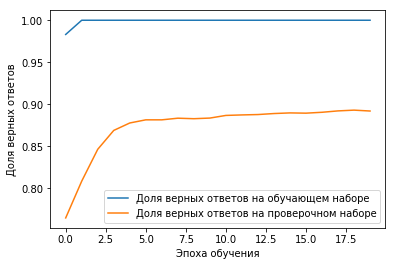

In [0]:
maxWordsCount4 = 5000 # Число слов из словаря, которые используем для анализа

# Создаём полносвязную сеть

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount4, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  97 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  89 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  73 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  78 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  93 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  99 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  89 %



**1.e. Нейронка с bag of words and maxWordsCount = 10000**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 4s 239us/sample - loss: 0.0583 - acc: 0.9819 - val_loss: 0.7699 - val_acc: 0.8060
Epoch 2/20
17863/17863 [==============================] - 4s 211us/sample - loss: 5.5291e-04 - acc: 1.0000 - val_loss: 0.6136 - val_acc: 0.8560
Epoch 3/20
17863/17863 [==============================] - 4s 211us/sample - loss: 3.0231e-04 - acc: 1.0000 - val_loss: 0.4822 - val_acc: 0.8761
Epoch 4/20
17863/17863 [==============================] - 4s 205us/sample - loss: 2.0777e-04 - acc: 1.0000 - val_loss: 0.3954 - val_acc: 0.8839
Epoch 5/20
17863/17863 [==============================] - 4s 209us/sample - loss: 1.6134e-04 - acc: 1.0000 - val_loss: 0.3525 - val_acc: 0.8872
Epoch 6/20
17863/17863 [==============================] - 4s 209us/sample - loss: 1.1516e-04 - acc: 1.0000 - val_loss: 0.3389 - val_acc: 0.8879
Epoch 7/20
17863/17863 [==============================] - 4s 209us/sample - loss: 9.1717e-0

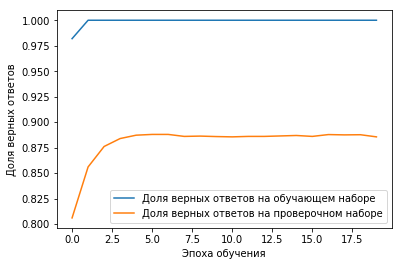

In [0]:
maxWordsCount5 = 10000 # Число слов из словаря, которые используем для анализа

# Создаём полносвязную сеть

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount5, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  98 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  80 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  74 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  87 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  93 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  98 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  88 %



**1.f. Нейронка с bag of words and maxWordsCount = 50000**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 4s 248us/sample - loss: 0.0567 - acc: 0.9828 - val_loss: 0.7829 - val_acc: 0.7785
Epoch 2/20
17863/17863 [==============================] - 4s 207us/sample - loss: 5.2345e-04 - acc: 1.0000 - val_loss: 0.6390 - val_acc: 0.8099
Epoch 3/20
17863/17863 [==============================] - 4s 207us/sample - loss: 3.2213e-04 - acc: 1.0000 - val_loss: 0.4962 - val_acc: 0.8509
Epoch 4/20
17863/17863 [==============================] - 4s 202us/sample - loss: 2.0596e-04 - acc: 1.0000 - val_loss: 0.4026 - val_acc: 0.8722
Epoch 5/20
17863/17863 [==============================] - 4s 207us/sample - loss: 1.4391e-04 - acc: 1.0000 - val_loss: 0.3556 - val_acc: 0.8801
Epoch 6/20
17863/17863 [==============================] - 4s 210us/sample - loss: 1.1724e-04 - acc: 1.0000 - val_loss: 0.3356 - val_acc: 0.8848
Epoch 7/20
17863/17863 [==============================] - 4s 207us/sample - loss: 9.2097e-0

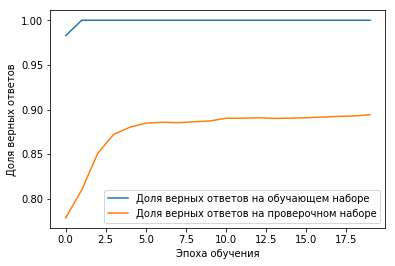

In [0]:
maxWordsCount6 = 50000 # Число слов из словаря, которые используем для анализа

# Создаём полносвязную сеть

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount6, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  97 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  88 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  78 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  75 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  92 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  98 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  89 %



## 2. Нейронка c bag of words (01) при maxWordsCount = 20000 и разных архитектурах

In [0]:
maxWordsCount7 = 20000

**2.a Поменяйте количество нейронов в слоях**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 5s 260us/sample - loss: 0.0468 - acc: 0.9852 - val_loss: 0.7671 - val_acc: 0.7597
Epoch 2/20
17863/17863 [==============================] - 4s 226us/sample - loss: 1.5992e-04 - acc: 1.0000 - val_loss: 0.6134 - val_acc: 0.8289
Epoch 3/20
17863/17863 [==============================] - 4s 230us/sample - loss: 9.0503e-05 - acc: 1.0000 - val_loss: 0.4797 - val_acc: 0.8614
Epoch 4/20
17863/17863 [==============================] - 4s 234us/sample - loss: 6.5080e-05 - acc: 1.0000 - val_loss: 0.4047 - val_acc: 0.8683
Epoch 5/20
17863/17863 [==============================] - 4s 235us/sample - loss: 4.6524e-05 - acc: 1.0000 - val_loss: 0.3800 - val_acc: 0.8651
Epoch 6/20
17863/17863 [==============================] - 4s 232us/sample - loss: 3.6518e-05 - acc: 1.0000 - val_loss: 0.3783 - val_acc: 0.8656
Epoch 7/20
17863/17863 [==============================] - 4s 228us/sample - loss: 2.7736e-0

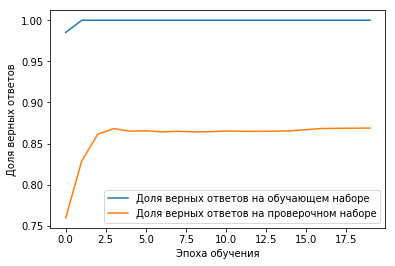

In [0]:
# Создаём полносвязную сеть 400

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(400, input_dim=maxWordsCount7, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  97 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  83 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  66 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  77 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  94 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  97 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  86 %



Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 5s 284us/sample - loss: 0.0403 - acc: 0.9866 - val_loss: 0.6289 - val_acc: 0.7940
Epoch 2/20
17863/17863 [==============================] - 5s 252us/sample - loss: 5.7014e-05 - acc: 1.0000 - val_loss: 0.5299 - val_acc: 0.8067
Epoch 3/20
17863/17863 [==============================] - 4s 248us/sample - loss: 2.3977e-05 - acc: 1.0000 - val_loss: 0.4346 - val_acc: 0.8412
Epoch 4/20
17863/17863 [==============================] - 5s 257us/sample - loss: 1.7627e-05 - acc: 1.0000 - val_loss: 0.3997 - val_acc: 0.8536
Epoch 5/20
17863/17863 [==============================] - 5s 253us/sample - loss: 1.4168e-05 - acc: 1.0000 - val_loss: 0.4013 - val_acc: 0.8584
Epoch 6/20
17863/17863 [==============================] - 4s 247us/sample - loss: 1.0224e-05 - acc: 1.0000 - val_loss: 0.4185 - val_acc: 0.8595
Epoch 7/20
17863/17863 [==============================] - 5s 252us/sample - loss: 8.5936e-0

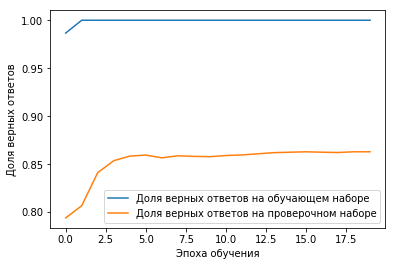

In [0]:
# Создаём полносвязную сеть 800

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(800, input_dim=maxWordsCount7, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  98 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  79 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  71 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  69 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  93 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  97 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  86 %



Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 5s 297us/sample - loss: 0.0387 - acc: 0.9880 - val_loss: 0.5799 - val_acc: 0.8123
Epoch 2/20
17863/17863 [==============================] - 5s 261us/sample - loss: 4.2343e-05 - acc: 1.0000 - val_loss: 0.5048 - val_acc: 0.8316
Epoch 3/20
17863/17863 [==============================] - 5s 266us/sample - loss: 1.7459e-05 - acc: 1.0000 - val_loss: 0.4278 - val_acc: 0.8538
Epoch 4/20
17863/17863 [==============================] - 5s 261us/sample - loss: 1.2916e-05 - acc: 1.0000 - val_loss: 0.4092 - val_acc: 0.8645
Epoch 5/20
17863/17863 [==============================] - 5s 265us/sample - loss: 8.4598e-06 - acc: 1.0000 - val_loss: 0.4294 - val_acc: 0.8675
Epoch 6/20
17863/17863 [==============================] - 5s 257us/sample - loss: 8.6227e-06 - acc: 1.0000 - val_loss: 0.4654 - val_acc: 0.8654
Epoch 7/20
17863/17863 [==============================] - 5s 256us/sample - loss: 4.6963e-0

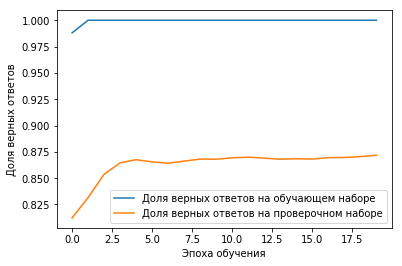

In [0]:
# Создаём полносвязную сеть 1200

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(1200, input_dim=maxWordsCount7, activation="relu"))
model01.add(Dropout(0.25))
model01.add(BatchNormalization())
model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  93 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  72 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  72 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  87 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  95 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  98 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  87 %



**2.b Поменяйте количество слоёв**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 6s 318us/sample - loss: 0.0499 - acc: 0.9844 - val_loss: 1.3209 - val_acc: 0.6001
Epoch 2/20
17863/17863 [==============================] - 5s 263us/sample - loss: 6.5418e-05 - acc: 1.0000 - val_loss: 1.3835 - val_acc: 0.5773
Epoch 3/20
17863/17863 [==============================] - 5s 272us/sample - loss: 3.0191e-05 - acc: 1.0000 - val_loss: 1.0277 - val_acc: 0.6728
Epoch 4/20
17863/17863 [==============================] - 5s 271us/sample - loss: 1.9622e-05 - acc: 1.0000 - val_loss: 0.7191 - val_acc: 0.7667
Epoch 5/20
17863/17863 [==============================] - 5s 259us/sample - loss: 1.4615e-05 - acc: 1.0000 - val_loss: 0.5501 - val_acc: 0.8241
Epoch 6/20
17863/17863 [==============================] - 5s 253us/sample - loss: 1.2020e-05 - acc: 1.0000 - val_loss: 0.4733 - val_acc: 0.8557
Epoch 7/20
17863/17863 [==============================] - 5s 256us/sample - loss: 1.1090e-0

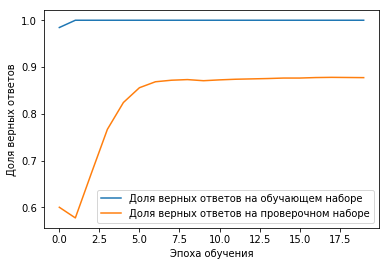

In [0]:
# Создаём полносвязную сеть 1200 - 600 - 6

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(1200, input_dim=maxWordsCount7, activation="relu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(600, input_dim=maxWordsCount7, activation="relu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))


model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  96 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  84 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  63 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  89 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  96 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  97 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  87 %



Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 6s 337us/sample - loss: 0.0688 - acc: 0.9788 - val_loss: 1.5259 - val_acc: 0.5112
Epoch 2/20
17863/17863 [==============================] - 5s 267us/sample - loss: 2.2661e-04 - acc: 1.0000 - val_loss: 1.3809 - val_acc: 0.5706
Epoch 3/20
17863/17863 [==============================] - 5s 271us/sample - loss: 1.2968e-04 - acc: 1.0000 - val_loss: 0.9216 - val_acc: 0.7183
Epoch 4/20
17863/17863 [==============================] - 5s 275us/sample - loss: 9.1768e-05 - acc: 1.0000 - val_loss: 0.6819 - val_acc: 0.7884
Epoch 5/20
17863/17863 [==============================] - 5s 274us/sample - loss: 6.5731e-05 - acc: 1.0000 - val_loss: 0.5835 - val_acc: 0.8190
Epoch 6/20
17863/17863 [==============================] - 5s 274us/sample - loss: 5.0633e-05 - acc: 1.0000 - val_loss: 0.5151 - val_acc: 0.8382
Epoch 7/20
17863/17863 [==============================] - 5s 275us/sample - loss: 4.2836e-0

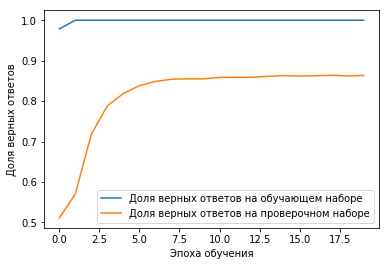

In [0]:
# Создаём полносвязную сеть 1200 - 600 - 300 - 6

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(1200, input_dim=maxWordsCount7, activation="relu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(600, input_dim=maxWordsCount7, activation="relu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(300, input_dim=maxWordsCount7, activation="relu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.20))

model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  97 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  78 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  64 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  80 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  95 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  98 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  86 %



Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 7s 367us/sample - loss: 0.0649 - acc: 0.9803 - val_loss: 1.0939 - val_acc: 0.6422
Epoch 2/20
17863/17863 [==============================] - 5s 281us/sample - loss: 2.8402e-04 - acc: 1.0000 - val_loss: 0.9842 - val_acc: 0.6645
Epoch 3/20
17863/17863 [==============================] - 5s 280us/sample - loss: 1.6123e-04 - acc: 1.0000 - val_loss: 0.7465 - val_acc: 0.7242
Epoch 4/20
17863/17863 [==============================] - 5s 279us/sample - loss: 1.1446e-04 - acc: 1.0000 - val_loss: 0.5633 - val_acc: 0.8000
Epoch 5/20
17863/17863 [==============================] - 5s 279us/sample - loss: 8.1679e-05 - acc: 1.0000 - val_loss: 0.4623 - val_acc: 0.8349
Epoch 6/20
17863/17863 [==============================] - 5s 288us/sample - loss: 6.4144e-05 - acc: 1.0000 - val_loss: 0.4113 - val_acc: 0.8581
Epoch 7/20
17863/17863 [==============================] - 5s 280us/sample - loss: 5.1693e-0

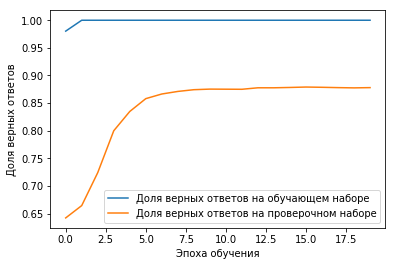

In [0]:
# Создаём полносвязную сеть 1400 - 700 - 200 - 6

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(1400, input_dim=maxWordsCount7, activation="relu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(700, input_dim=maxWordsCount7, activation="relu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount7, activation="relu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.20))

model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  99 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  87 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  64 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  85 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  93 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  98 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  87 %



**В Ы В О Д Ы:**

**2.c Разные активационные функции скрытых слоёв**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 6s 348us/sample - loss: 0.1564 - acc: 0.9769 - val_loss: 1.6717 - val_acc: 0.2983
Epoch 2/20
17863/17863 [==============================] - 5s 266us/sample - loss: 0.0083 - acc: 1.0000 - val_loss: 1.5541 - val_acc: 0.2983
Epoch 3/20
17863/17863 [==============================] - 5s 254us/sample - loss: 0.0038 - acc: 1.0000 - val_loss: 1.3141 - val_acc: 0.4366
Epoch 4/20
17863/17863 [==============================] - 5s 262us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 0.9608 - val_acc: 0.8302
Epoch 5/20
17863/17863 [==============================] - 5s 256us/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.5891 - val_acc: 0.8891
Epoch 6/20
17863/17863 [==============================] - 5s 252us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3602 - val_acc: 0.8990
Epoch 7/20
17863/17863 [==============================] - 4s 251us/sample - loss: 8.1982e-04 - acc: 1.0000 - va

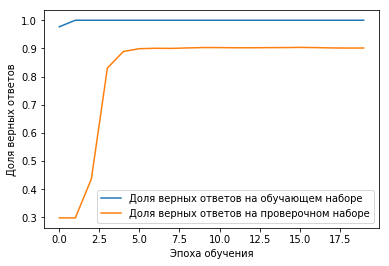

In [0]:
# Создаём полносвязную сеть 800 - 400 - 200 - 6

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(800, input_dim=maxWordsCount7, activation="relu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(400, input_dim=maxWordsCount7, activation="sigmoid"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount7, activation="softmax"))
model01.add(BatchNormalization())
model01.add(Dropout(0.20))

model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  99 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  95 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  79 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  80 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  88 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  99 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  90 %



Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 7s 383us/sample - loss: 0.1593 - acc: 0.9784 - val_loss: 1.6137 - val_acc: 0.2983
Epoch 2/20
17863/17863 [==============================] - 5s 267us/sample - loss: 0.0082 - acc: 1.0000 - val_loss: 1.5119 - val_acc: 0.2985
Epoch 3/20
17863/17863 [==============================] - 5s 255us/sample - loss: 0.0038 - acc: 1.0000 - val_loss: 1.3210 - val_acc: 0.3923
Epoch 4/20
17863/17863 [==============================] - 5s 253us/sample - loss: 0.0022 - acc: 1.0000 - val_loss: 1.0259 - val_acc: 0.7487
Epoch 5/20
17863/17863 [==============================] - 5s 269us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 0.6879 - val_acc: 0.8569
Epoch 6/20
17863/17863 [==============================] - 5s 274us/sample - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4364 - val_acc: 0.8788
Epoch 7/20
17863/17863 [==============================] - 5s 276us/sample - loss: 7.6314e-04 - acc: 1.0000 - va

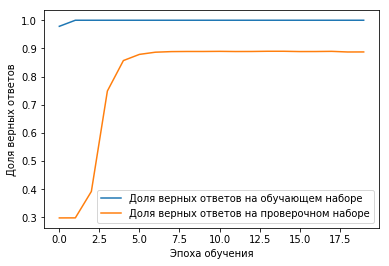

In [0]:
# Создаём полносвязную сеть 800 - 400 - 200 - 6

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(800, input_dim=maxWordsCount7, activation="relu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(400, input_dim=maxWordsCount7, activation="elu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount7, activation="softmax"))
model01.add(BatchNormalization())
model01.add(Dropout(0.20))

model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  100 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  96 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  72 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  75 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  88 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  99 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  88 %



Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 7s 387us/sample - loss: 0.2483 - acc: 0.9641 - val_loss: 1.7304 - val_acc: 0.2983
Epoch 2/20
17863/17863 [==============================] - 5s 302us/sample - loss: 0.0122 - acc: 0.9999 - val_loss: 1.7267 - val_acc: 0.2983
Epoch 3/20
17863/17863 [==============================] - 5s 275us/sample - loss: 0.0054 - acc: 0.9999 - val_loss: 1.7093 - val_acc: 0.2983
Epoch 4/20
17863/17863 [==============================] - 5s 272us/sample - loss: 0.0028 - acc: 1.0000 - val_loss: 1.6316 - val_acc: 0.2983
Epoch 5/20
17863/17863 [==============================] - 5s 280us/sample - loss: 0.0020 - acc: 0.9999 - val_loss: 1.4115 - val_acc: 0.3049
Epoch 6/20
17863/17863 [==============================] - 5s 268us/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.9798 - val_acc: 0.7417
Epoch 7/20
17863/17863 [==============================] - 5s 273us/sample - loss: 9.9154e-04 - acc: 1.0000 - va

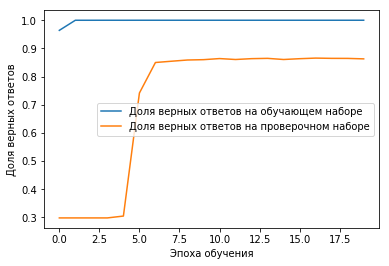

In [0]:
# Создаём полносвязную сеть 800 - 400 - 200 - 6

model01 = Sequential()
model01.add(BatchNormalization())
model01.add(Dense(800, input_dim=maxWordsCount7, activation="relu"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(400, input_dim=maxWordsCount7, activation="softmax"))
model01.add(BatchNormalization())
model01.add(Dropout(0.25))

model01.add(BatchNormalization())
model01.add(Dense(200, input_dim=maxWordsCount7, activation="softmax"))
model01.add(BatchNormalization())
model01.add(Dropout(0.20))

model01.add(Dense(6, activation='softmax'))

model01.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на выборке, сформированной по bag of words - xTrain01

history = model01.fit(xTrain01, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll01, yTestAll))

plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

#####
# Расспознаём тестовую выборку и выводим результаты
#####

def recognizeMultiClass(model, xTest, modelName):
  print("НЕЙРОНКА: ", modelName)
  print()
  
  val = []
  pred = []
  
  totalSumRec = []
  
  # Проходим по всем классам
  
  for i in range(nClasses):
    
    # Получаем результаты распознавания класса по блокам слов длины xLen
    
    currPred = model.predict(xTest[i])
    pred.append(currPred)
    
    # Определяем номер распознанного класса для каждохо блока слов длины xLen
    currOut = np.argmax(currPred, axis=1)
    
    # Считаем процент распознавания каждого класса за каждый
    # Получам матрицу 6 на 6
    
    evVal = []
    sumRec = []
    for j in range(nClasses):
      sumRec.append(0)
      for t in range(len(currOut)):
        if (currOut[t] == j):
          sumRec[j] += 1
      evVal.append(sumRec[j] / len(currOut))
    
    totalSumRec.append(sumRec[i])
    
    # Определяем, какой в класс в итоге за какой был распознан
    
    val.append(evVal[i])
    recognizedClass = np.argmax(evVal)
    
    # Выводим результаты распознавания по текущему классу
    
    isRecognized = "распознано НЕ ВЕРНО!"
    if (recognizedClass == i):
      isRecognized = "распознано ВЕРНО!"
    print(className[i], " расспознано ", int(100*evVal[i]), "% сеть считает, что это ", className[recognizedClass], ", ", isRecognized)
  
  # Выводим вредний процент распознавания по всем классам вместе
  
  print()
  sumVal = 0
  sumCount = 0
  lenXtest = []
  for i in range(nClasses):
    sumCount += len(xTest[i])
    sumVal += totalSumRec[i]
  print("Средний процент распознавания ", int(100*sumVal/sumCount), "%")
    
  print()
  
  return sumVal/sumCount

In [0]:
# Проверяем точность нейронки обученной на bag of words

pred = recognizeMultiClass(model01, xTest01, "Тексты 01 + Dense")

НЕЙРОНКА:  Тексты 01 + Dense

О. Генри  расспознано  100 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  90 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  70 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  83 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  90 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  99 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  88 %



**В Ы В О Д Ы:**

##  Нейронка c Embbedding при maxWordsCount = 50000, разный размер Embedding пространства

**2.a. Embedding пространство = 2**

In [0]:
maxWordsCount = 50000

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 3s 161us/sample - loss: 1.5398 - acc: 0.4280 - val_loss: 1.6639 - val_acc: 0.2983
Epoch 2/20
17863/17863 [==============================] - 1s 78us/sample - loss: 0.4471 - acc: 0.8403 - val_loss: 1.8281 - val_acc: 0.2983
Epoch 3/20
17863/17863 [==============================] - 1s 78us/sample - loss: 0.2272 - acc: 0.9235 - val_loss: 1.7372 - val_acc: 0.2983
Epoch 4/20
17863/17863 [==============================] - 1s 81us/sample - loss: 0.1423 - acc: 0.9555 - val_loss: 1.8165 - val_acc: 0.2986
Epoch 5/20
17863/17863 [==============================] - 1s 80us/sample - loss: 0.1164 - acc: 0.9610 - val_loss: 1.7679 - val_acc: 0.3154
Epoch 6/20
17863/17863 [==============================] - 1s 76us/sample - loss: 0.0934 - acc: 0.9707 - val_loss: 1.7340 - val_acc: 0.3595
Epoch 7/20
17863/17863 [==============================] - 1s 75us/sample - loss: 0.0884 - acc: 0.9697 - val_loss: 1.

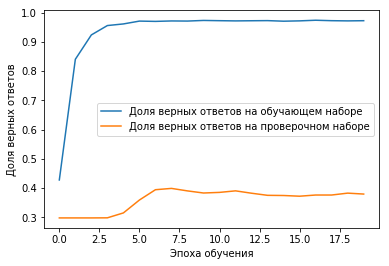

In [0]:
# Создаём сеть с Embedding слоем

modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 2, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(Dropout(0.25))
modelE.add(BatchNormalization())
modelE.add(Dense(6, activation='softmax'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на xTrain

history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
# Проверяем результаты работы Ebedding сети

pred = recognizeMultiClass(modelE, xTest, "Embedding + Dense")

НЕЙРОНКА:  Embedding + Dense

О. Генри  расспознано  15 % сеть считает, что это  Брэдбери ,  распознано НЕ ВЕРНО!
Стругацкие  расспознано  19 % сеть считает, что это  Саймак ,  распознано НЕ ВЕРНО!
Булгаков  расспознано  25 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  19 % сеть считает, что это  Стругацкие ,  распознано НЕ ВЕРНО!
Фрай  расспознано  75 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  23 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  37 %



**2.b. Embedding пространство = 10**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 3s 187us/sample - loss: 1.0781 - acc: 0.6576 - val_loss: 1.7896 - val_acc: 0.3382
Epoch 2/20
17863/17863 [==============================] - 1s 81us/sample - loss: 0.0349 - acc: 0.9927 - val_loss: 1.7833 - val_acc: 0.3177
Epoch 3/20
17863/17863 [==============================] - 1s 81us/sample - loss: 0.0192 - acc: 0.9966 - val_loss: 1.6683 - val_acc: 0.3260
Epoch 4/20
17863/17863 [==============================] - 1s 82us/sample - loss: 0.0120 - acc: 0.9979 - val_loss: 1.5374 - val_acc: 0.3617
Epoch 5/20
17863/17863 [==============================] - 1s 81us/sample - loss: 0.0092 - acc: 0.9982 - val_loss: 1.2183 - val_acc: 0.5094
Epoch 6/20
17863/17863 [==============================] - 1s 81us/sample - loss: 0.0065 - acc: 0.9990 - val_loss: 1.1548 - val_acc: 0.5640
Epoch 7/20
17863/17863 [==============================] - 1s 81us/sample - loss: 0.0063 - acc: 0.9984 - val_loss: 1.

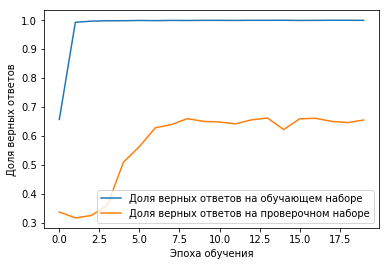

In [0]:
# Создаём сеть с Embedding слоем

modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 10, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(BatchNormalization())
modelE.add(Dropout(0.25))
modelE.add(Dense(6, activation='softmax'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на xTrain

history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
# Проверяем результаты работы Ebedding сети

pred = recognizeMultiClass(modelE, xTest, "Embedding + Dense")

НЕЙРОНКА:  Embedding + Dense

О. Генри  расспознано  59 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  39 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  57 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  45 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  79 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  82 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  65 %



**2.c. Embedding пространство = 50**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 4s 240us/sample - loss: 0.6958 - acc: 0.7986 - val_loss: 1.7209 - val_acc: 0.3286
Epoch 2/20
17863/17863 [==============================] - 2s 121us/sample - loss: 0.0079 - acc: 0.9997 - val_loss: 1.5612 - val_acc: 0.3431
Epoch 3/20
17863/17863 [==============================] - 2s 122us/sample - loss: 0.0035 - acc: 0.9999 - val_loss: 1.4335 - val_acc: 0.3551
Epoch 4/20
17863/17863 [==============================] - 2s 124us/sample - loss: 0.0022 - acc: 0.9999 - val_loss: 1.2305 - val_acc: 0.4759
Epoch 5/20
17863/17863 [==============================] - 2s 124us/sample - loss: 0.0014 - acc: 1.0000 - val_loss: 1.0498 - val_acc: 0.6022
Epoch 6/20
17863/17863 [==============================] - 2s 125us/sample - loss: 9.9358e-04 - acc: 1.0000 - val_loss: 0.9638 - val_acc: 0.6545
Epoch 7/20
17863/17863 [==============================] - 2s 126us/sample - loss: 7.4230e-04 - acc: 1.0000 

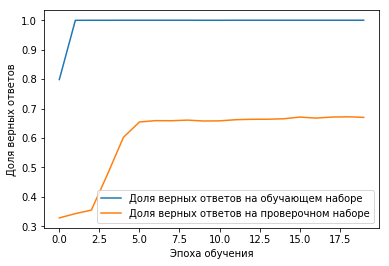

In [0]:
# Создаём сеть с Embedding слоем

modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 50, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(BatchNormalization())
modelE.add(Dropout(0.25))
modelE.add(Dense(6, activation='softmax'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на xTrain

history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
# Проверяем результаты работы Ebedding сети

pred = recognizeMultiClass(modelE, xTest, "Embedding + Dense")

НЕЙРОНКА:  Embedding + Dense

О. Генри  расспознано  87 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  30 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Булгаков  расспознано  55 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  33 % сеть считает, что это  О. Генри ,  распознано НЕ ВЕРНО!
Фрай  расспознано  81 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  89 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  67 %



**2.d. Embedding пространство = 200**

Train on 17863 samples, validate on 6674 samples
Epoch 1/20
17863/17863 [==============================] - 9s 524us/sample - loss: 0.6144 - acc: 0.8397 - val_loss: 1.7104 - val_acc: 0.1603
Epoch 2/20
17863/17863 [==============================] - 7s 399us/sample - loss: 0.0105 - acc: 0.9999 - val_loss: 1.4811 - val_acc: 0.3870
Epoch 3/20
17863/17863 [==============================] - 7s 399us/sample - loss: 0.0031 - acc: 1.0000 - val_loss: 1.3235 - val_acc: 0.3957
Epoch 4/20
17863/17863 [==============================] - 7s 402us/sample - loss: 0.0018 - acc: 1.0000 - val_loss: 1.1466 - val_acc: 0.5025
Epoch 5/20
17863/17863 [==============================] - 7s 406us/sample - loss: 0.0011 - acc: 1.0000 - val_loss: 0.9925 - val_acc: 0.6334
Epoch 6/20
17863/17863 [==============================] - 7s 403us/sample - loss: 8.6489e-04 - acc: 1.0000 - val_loss: 0.9005 - val_acc: 0.6933
Epoch 7/20
17863/17863 [==============================] - 7s 402us/sample - loss: 6.3537e-04 - acc: 1.0000 

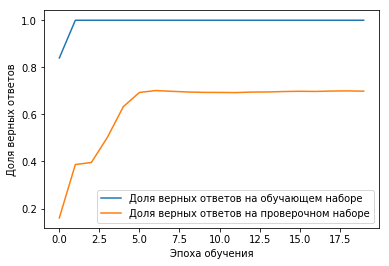

In [0]:
# Создаём сеть с Embedding слоем

modelE = Sequential()
modelE.add(Embedding(maxWordsCount, 200, input_length=xLen))
modelE.add(SpatialDropout1D(0.2))
modelE.add(Flatten())
modelE.add(BatchNormalization())
modelE.add(Dense(200, activation="relu"))
modelE.add(BatchNormalization())
modelE.add(Dropout(0.25))
modelE.add(Dense(6, activation='softmax'))

modelE.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Обучаем сеть на xTrain

history = modelE.fit(xTrain, 
                    yTrain, 
                    epochs=20,
                    batch_size=200,
                    validation_data=(xTestAll, yTestAll))


plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [0]:
# Проверяем результаты работы Ebedding сети

pred = recognizeMultiClass(modelE, xTest, "Embedding + Dense")

НЕЙРОНКА:  Embedding + Dense

О. Генри  расспознано  89 % сеть считает, что это  О. Генри ,  распознано ВЕРНО!
Стругацкие  расспознано  35 % сеть считает, что это  Стругацкие ,  распознано ВЕРНО!
Булгаков  расспознано  55 % сеть считает, что это  Булгаков ,  распознано ВЕРНО!
Саймак  расспознано  53 % сеть считает, что это  Саймак ,  распознано ВЕРНО!
Фрай  расспознано  84 % сеть считает, что это  Фрай ,  распознано ВЕРНО!
Брэдбери  расспознано  88 % сеть считает, что это  Брэдбери ,  распознано ВЕРНО!

Средний процент распознавания  69 %



**В Ы В О Д Ы:**

1. 
О. Генри  расспознано  99 % 
2. 
Брэдбери  расспознано  98 % 
**- при maxwordcount = 100**

3. 
Саймак  расспознано  91 % !
4. 
Фрай  расспознано  95 % 
5.
Булгаков  расспознано  78 %
**- при при maxwordcount = 50000**


6. 
Стругацкие  расспознано  96 % 
**- при добавлении слоев  (800 - 400 - 200 - 6) и замене активационных функций на elu и softmax**





**Итог**: Результатом изменения параметров можно считать  улучшение отдельных показателей, по отдельным авторам. Однако на среднем проценте распознавания - это почти не отражается. В основном потому что Брэдбери и О.Генри распознаются почти всегда с 99-98 % точностью. 
А для других авторов можно подбирать тот параметр, который обеспечивает высокую точность именно для конкретного атвора.
